In [1]:
import os
import pandas as pd

In [2]:
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
from collections import Counter

In [3]:
# Path to the CSV file (adjust to your path)
csv_file = "C:/Users/HP/Desktop/image_dataset.csv"

In [4]:
# Load the CSV file
df = pd.read_csv(csv_file)

In [5]:
# Function to load and preprocess images
def load_image(image_path, size=(64, 64)):
    try:
        # Open the image file
        img = Image.open(image_path).convert('RGB')
        # Resize the image to the required size (e.g., 64x64)
        img = img.resize(size)
        # Convert image to numpy array and flatten it
        img_array = np.array(img).flatten()
        return img_array
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

In [6]:
# Preprocess all images and extract features
X = []
y = []

for index, row in df.iterrows():
    # Load the image
    image_path = row['Filepath']
    image_array = load_image(image_path)
    
    if image_array is not None:
        X.append(image_array)
        y.append(row['Subfolder'])  # Use subfolder as the label (e.g., Downdog, Plank)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode labels (convert yoga pose names to numeric values)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [26]:
# Create XGBoost classifier model
xgb_model = xgb.XGBClassifier()

In [27]:
# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

In [29]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.92%


In [31]:
# Function to make multiple predictions and select the most frequent one
def consistent_prediction(model, image_data, num_iterations=10):
    predictions = []
    for _ in range(num_iterations):
        pred = model.predict(image_data)  # Make a prediction
        predictions.append(pred[0])  # Append the prediction result
    
    # Find the most common prediction
    most_common_prediction = Counter(predictions).most_common(1)[0][0]
    return most_common_prediction

In [32]:
# Function to load and preprocess a new image
def load_and_preprocess_image(image_path, size=(64, 64)):
    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize(size)
        img_array = np.array(img).flatten()  # Flatten the image to a 1D array
        return img_array
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

In [38]:
# Function to make multiple predictions and ensure consistency
def classify_with_consistency_and_rejection(image_path, model, label_encoder, num_iterations=10, threshold=0.7):
    try:
        # Load and preprocess the new image
        img = Image.open(image_path).convert('RGB')
        img = img.resize((64, 64))
        img_array = np.array(img).flatten()
        
        # Add batch dimension (needed for model input)
        img_array = np.expand_dims(img_array, axis=0)
        
        # Collect multiple predictions
        predictions = []
        for _ in range(num_iterations):
            probabilities = model.predict_proba(img_array)[0]  # Predict probabilities
            max_prob = np.max(probabilities)
            predicted_class_index = np.argmax(probabilities)
            
            # If below the confidence threshold, classify as "Unknown"
            if max_prob < threshold:
                predictions.append("Unknown/Unrelated pose")
            else:
                # Convert numeric prediction to label
                predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]
                predictions.append(predicted_label)
        
        # Find the most common prediction
        most_common_prediction = Counter(predictions).most_common(1)[0][0]
        return most_common_prediction
    except Exception as e:
        return f"Error during classification: {e}"

In [54]:
# Example usage
image_path = 'C:/Users/HP/Desktop/Images/InCorrect/00000041.jpg'  # Replace with your test image path

# Predict pose with consistency and rejection mechanism
predicted_pose = classify_with_consistency_and_rejection(
    image_path, xgb_model, label_encoder, num_iterations=10, threshold=0.7
)

print(f"The predicted pose for the given image is: {predicted_pose}")

The predicted pose for the given image is: Warrior2


In [9]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)


In [12]:
# Function to display image
def display_image(image_array):
    img = image_array.reshape(64, 64, 3)  # Reshape to original dimensions
    plt.imshow(img)
    plt.axis('off')
    plt.show()

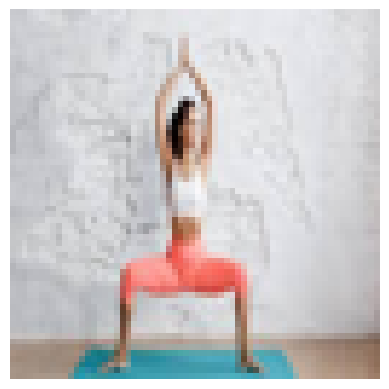

Actual: Sumo squat, Predicted: Sumo squat


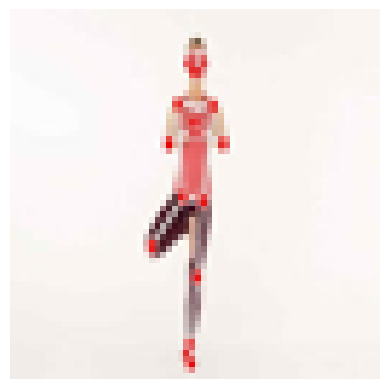

Actual: Tree, Predicted: Tree


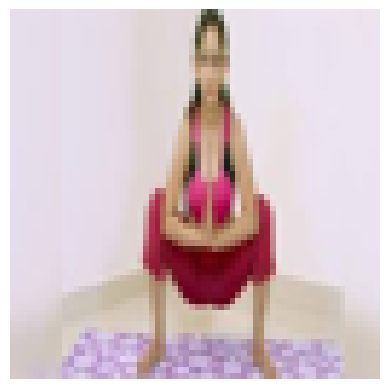

Actual: Malasana, Predicted: Malasana


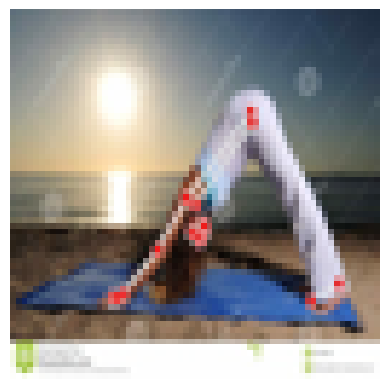

Actual: Downdog, Predicted: Malasana


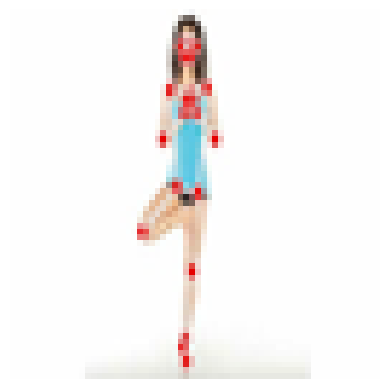

Actual: Tree, Predicted: Tree


In [13]:
# Display a few sample images with their actual and predicted labels
num_samples = 5
for i in range(num_samples):
    display_image(X_test[i].reshape(64, 64, 3))  # Reshape to 64x64x3 before display
    actual_label = label_encoder.inverse_transform([y_test[i]])[0]
    predicted_label = label_encoder.inverse_transform([y_pred[i]])[0]
    print(f'Actual: {actual_label}, Predicted: {predicted_label}')

In [14]:
import numpy as np
from PIL import Image

In [15]:
# Function to load and preprocess the new image
def load_and_preprocess_image(image_path, size=(64, 64)):
    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize(size)
        img_array = np.array(img).flatten()  # Flatten the image to a 1D array
        return img_array
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

In [16]:
# Function to classify a new image with a rejection mechanism for unknown poses
def classify_new_image_with_rejection(image_path, clf, label_encoder, threshold=0.7):
    # Load and preprocess the new image
    new_image = load_and_preprocess_image(image_path)
    if new_image is None:
        return "Error in image loading."
    
    # Expand dimensions to fit model input (add batch dimension)
    new_image = np.expand_dims(new_image, axis=0)
    
    # Predict probabilities for each class
    probabilities = clf.predict_proba(new_image)[0]  # Get probability for each class
    
    # Get the highest probability and the corresponding class
    max_prob = np.max(probabilities)
    predicted_class_index = np.argmax(probabilities)
    
    # If the highest probability is below the threshold, classify as "unknown"
    if max_prob < threshold:
        return "Unknown/Unrelated pose"
    
    # Otherwise, convert the predicted class index to the original label
    predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]
    return predicted_label


In [17]:
# Example usage: classify a new image with rejection mechanism
new_image_path = 'C:/Users/HP/Desktop/test_11.jfif'

# Assuming your trained XGBoost model is `xgb_model` and label encoder is `label_encoder`
predicted_pose = classify_new_image_with_rejection(new_image_path, xgb_model, label_encoder, threshold=0.7)

print(f'The predicted pose for the given image is: {predicted_pose}')

The predicted pose for the given image is: Unknown/Unrelated pose


In [18]:
import pickle

# Save the trained XGBoost model
with open('new_classification_xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Save the LabelEncoder
with open('new_label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [19]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input
import joblib

# Load your trained XGBoost model
xgb_model = joblib.load('C:/Users/HP/new_classification_xgb_model.pkl')

# Create a Keras model to save in .h5 format
def create_keras_model(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))  # Use Input layer for defining input shape
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class
    return model

# Assuming X has been loaded and y_encoded is available
num_classes = len(np.unique(y_encoded))  # Number of classes in your dataset
input_shape = X.shape[1]  # Number of features

# Create Keras model
keras_model = create_keras_model(input_shape, num_classes)

# Compile the model (you may adjust loss and optimizer as needed)
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Note: You may need to manually set the weights of the Keras model to those of the XGBoost model.
# This is non-trivial and may require additional steps, as Keras and XGBoost are different architectures.

# Save the Keras model in .h5 format
keras_model.save('C:/Users/HP/yoga_pose_model.h5')
